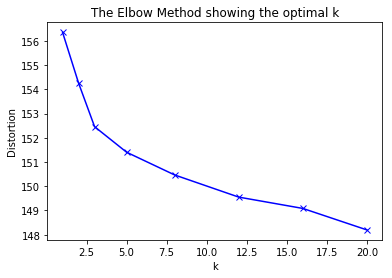

In [52]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

docWords=np.load("science2k-doc-word.npy")
distortions = []
K=[1,2,3,5,8,12,16,20]
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(docWords)
    distortions.append(sum(np.min(cdist(docWords, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / docWords.shape[0])

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

We choose k = 3 with respect to the following reason. According to the elbow method, which determines the k by taking consideration of the percentage of variance explained as a function of the number of clusters. k = 5 is also a potential choice. However, by inspecting the top 10 example within each clusters when we use k = 3, k = 5. When k = 3, we find that there are two groups are biology-related and geography-related respectively, also a group which we are not able to identify which is very elusive. But when k = 5, there is clearly two groups that is biology-related that imply we get too large k. In addition, it is better to have uniform distributed groups among all clusters, and k = 3 has great performance where all three clusters has more than 400 instances, when k = 5 gives extremely worse situation where some group only has a couple of instances. Then we can claim the algorithm has somehow captures the related subject of the articles.

In [79]:
from sklearn.metrics import pairwise_distances
kmeanModel = KMeans(n_clusters=3).fit(docWords)
dists = pairwise_distances(kmeanModel.cluster_centers_, docWords)
closest = [ sorted(range(len(dist)), key=lambda i: dist[i] if kmeanModel.labels_[i] == index else 99999)[:10] for index, dist in enumerate(dists)]
print(closest)

[[997, 968, 541, 1314, 983, 767, 370, 704, 1000, 1032], [1281, 139, 1283, 724, 587, 797, 1227, 715, 159, 1359], [519, 574, 453, 499, 0, 90, 122, 123, 124, 777]]


In [71]:
f = open('science2k-titles.txt')
titles=[]
for line in f: titles.append(line)
# print(titles)
for i in closest[2]:
    print(titles[i])

"Requirement of NAD and SIR2 for Life-Span Extension by Calorie Restriction in Saccharomyces Cerevisiae"

"Suppression of Mutations in Mitochondrial DNA by tRNAs Imported from the Cytoplasm"

"Distinct Classes of Yeast Promoters Revealed by Differential TAF Recruitment"

"Efficient Initiation of HCV RNA Replication in Cell Culture"

"Ubiquitination: More Than Two to Tango"

"Negative Regulation of the SHATTERPROOF Genes by FRUITFULL during Arabidopsis Fruit Development"

"T Cell-Independent Rescue of B Lymphocytes from Peripheral Immune Tolerance"

"Reduced Food Intake and Body Weight in Mice Treated with Fatty Acid Synthase Inhibitors"

"Patterning of the Zebrafish Retina by a Wave of Sonic Hedgehog Activity"

"Active Remodeling of Somatic Nuclei in Egg Cytoplasm by the Nucleosomal ATPase ISWI"



we find that there are two groups are biology-related and geography-related respectively, also a group which we are not able to identify which is very elusive. This could be used to construct a recommendation system. After one read the article, we can send him or her some other article that he or he may interested in.

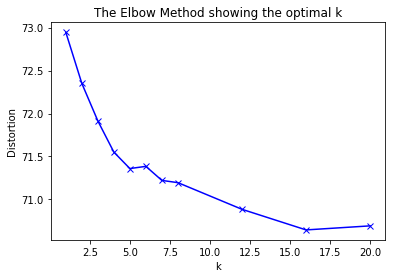

In [85]:
wordDocs=np.load("science2k-word-doc.npy")
distortions = []
K=[1,2,3,4,5,6,7,8,12,16,20]
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(wordDocs)
    distortions.append(sum(np.min(cdist(wordDocs, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / wordDocs.shape[0])

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

According to the elbow method, we choose k = 5

In [86]:
kmeanModel = KMeans(n_clusters=5).fit(wordDocs)
dists = pairwise_distances(kmeanModel.cluster_centers_, wordDocs)
closest = [ sorted(range(len(dist)), key=lambda i: dist[i] if kmeanModel.labels_[i] == index else 99999)[:10] for index, dist in enumerate(dists)]
print(closest)

[[5279, 5261, 4995, 4535, 5454, 3399, 5458, 4975, 5312, 5322], [2440, 1406, 3478, 1539, 2212, 2352, 1944, 2720, 1791, 1491], [2457, 3260, 959, 2562, 2673, 2824, 1827, 2112, 1616, 829], [4134, 4528, 4776, 2829, 5157, 2662, 3340, 3663, 4953, 1143], [5064, 4380, 4744, 4403, 5023, 4230, 4764, 5371, 4278, 4921]]


In [93]:
f = open('science2k-vocab.txt')
vocabs=[]
for line in f: vocabs.append(line)
for i in closest[4]:
    print(vocabs[i])

schools

weapons

recalls

clinton

geneticist

security

fight

prize

finished

spending

